<a href="https://colab.research.google.com/github/ZvoneST/pytorch-labs/blob/master/Projekt_HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset I will use for my project is https://www.kaggle.com/puneet6060/intel-image-classification
It contains 25k images of various natural sites around the world. Image size is 150x150. Images are distributed in 6
categories - buildings, forests, glacier, mountain, sea and street. The train set consists of 14k images, the test set has 3k and the prediction one has 7k. 
I will use CNN classification for solving this problem.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
%matplotlib inline
import random
import os
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

In [ ]:
train = "D:\ml\projekt\seg_train\seg_train"
test = "D:\ml\projekt\seg_test\seg_test"
pred = "D:\ml\projekt\seg_pred\seg_pred"

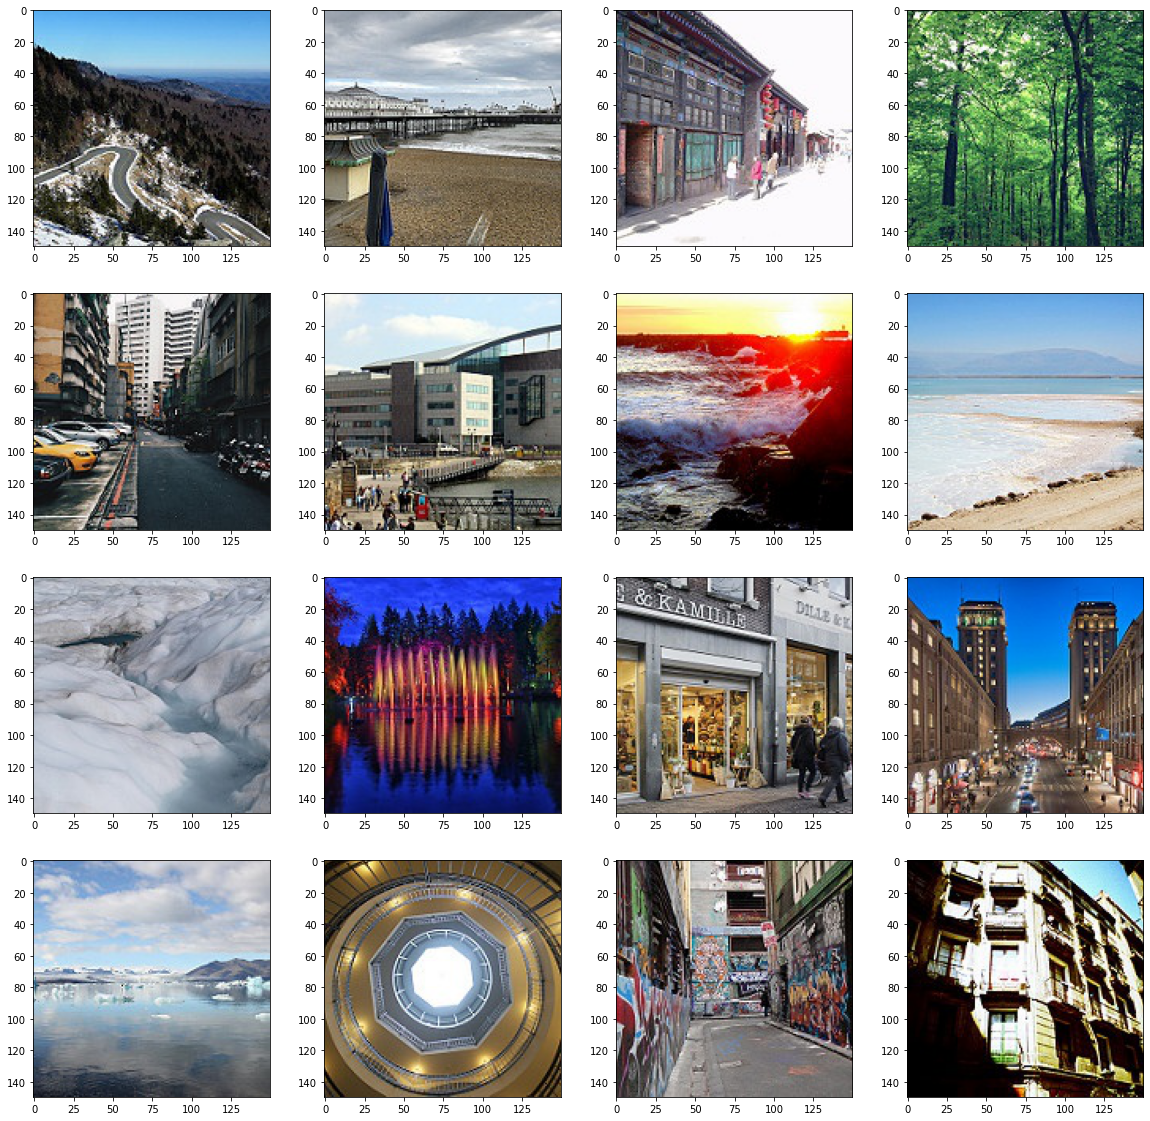

In [ ]:
images = []
for folder in os.listdir(train):
    for image in os.listdir(train + '/' + folder):
        images.append(os.path.join(train, folder, image))

plt.figure(figsize=(20,20))

for i in range(16):
    random_img = random.choice(images)
    imgs = mpimg.imread(random_img)
    plt.subplot(4, 4, i+1)
    plt.imshow(imgs)
plt.show()

In [ ]:
x=0
for folder in  os.listdir(train) : 
    files = glob.glob(pathname= str(train +'/'+ folder + '/*.jpg'))
    print(f'In the train folder, there are {len(files)} images inside the folder {folder}')
    x=x+len(files)
print(f'In the train folder, there are a total of',x ,'images')

In the train folder, there are 2191 images inside the folder buildings
In the train folder, there are 2271 images inside the folder forest
In the train folder, there are 2404 images inside the folder glacier
In the train folder, there are 2512 images inside the folder mountain
In the train folder, there are 2274 images inside the folder sea
In the train folder, there are 2382 images inside the folder street
In the train folder, there are a total of 14034 images


In [ ]:
x=0
for folder in  os.listdir(test) : 
    files = glob.glob(pathname= str(test +'/'+ folder + '/*.jpg'))
    x=x+len(files)
    print(f'In the test folder, there are {len(files)} images inside the folder {folder}')
print(f'In the test folder, there are a total of',x ,'images')

In the test folder, there are 437 images inside the folder buildings
In the test folder, there are 474 images inside the folder forest
In the test folder, there are 553 images inside the folder glacier
In the test folder, there are 525 images inside the folder mountain
In the test folder, there are 510 images inside the folder sea
In the test folder, there are 501 images inside the folder street
In the test folder, there are a total of 3000 images


In [ ]:
files = glob.glob(pathname= str(pred +'/*.jpg'))
print(f'In the prediction folder , there are a total of {len(files)} images')

In the prediction folder , there are a total of 7301 images


In [ ]:
train_transforms = transforms.Compose([transforms.Resize(255),
                                       transforms.RandomResizedCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.RandomResizedCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

train_data = datasets.ImageFolder(train, transform=train_transforms)
test_data = datasets.ImageFolder(test, transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64)

In [ ]:
model = models.resnet50(pretrained = True)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 